In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

## 1. Climate Change 데이터 이용 문제

In [2]:
climate_data = pd.read_csv('climate_change.csv')
climate_data

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06
...,...,...,...
701,2016-08-06,402.27,0.98
702,2016-09-06,401.05,0.87
703,2016-10-06,401.59,0.89
704,2016-11-06,403.55,0.93


In [3]:
## 시계열 데이터 그래프 그리기를 위한 시간 변환
climate_data['date'] = pd.to_datetime(climate_data['date'])

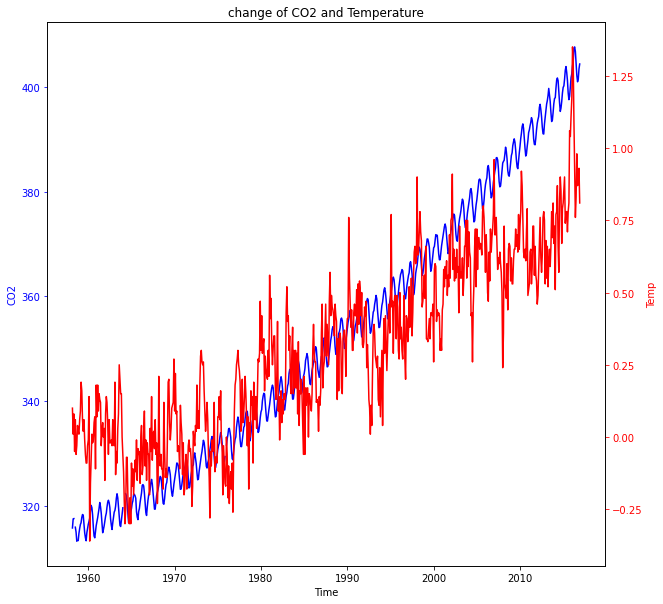

In [4]:
## Q1. 
fig, ax1 = plt.subplots()
ax1.plot(climate_data['date'], climate_data['co2'], color = 'blue')

ax2 = ax1.twinx()
ax2.plot(climate_data['date'], climate_data['relative_temp'], color = 'red')

ax1.set_xlabel('Time')

ax1.set_ylabel('CO2', color = 'blue')
ax1.tick_params(axis = 'y', colors = 'blue')

ax2.set_ylabel('Temp', color = 'red')
ax2.tick_params(axis = 'y', colors = 'red')

ax1.set_title('change of CO2 and Temperature')

plt.show()

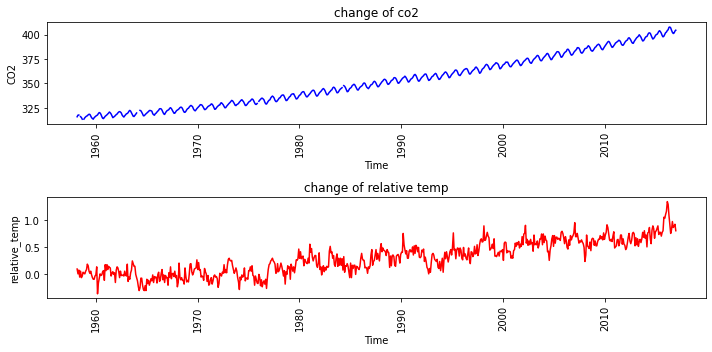

In [21]:
## Q2.
plt.figure(figsize = (10, 5))

plt.subplot(2,1,1)
plt.plot(climate_data['date'], climate_data['co2'], color = 'blue')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.xticks(rotation = 90)
plt.title('change of co2')

plt.subplot(2,1,2)
plt.plot(climate_data['date'], climate_data['relative_temp'], color = 'red')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('relative_temp')
plt.title('change of relative temp')

plt.tight_layout()
plt.show()

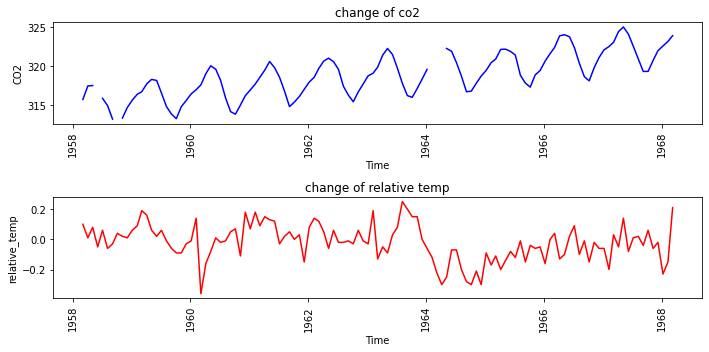

In [22]:
## Q3.

climate_data2 = climate_data[climate_data['date'] <= '1968-03-06']

plt.figure(figsize = (10, 5))

plt.subplot(2,1,1)
plt.plot(climate_data2['date'], climate_data2['co2'], color = 'blue')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.xticks(rotation = 90)
plt.title('change of co2')

plt.subplot(2,1,2)
plt.plot(climate_data2['date'], climate_data2['relative_temp'], color = 'red')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('relative_temp')
plt.title('change of relative temp')

plt.tight_layout()
plt.show()

**Q4. 위의 세 그래프를 이용하여 추론할 수 있는 내용을 서술해주세요.**

A. 첫번째 그래프와 두번째 그래프를 통해 시간의 흐름에 따라 상대온도와 이산화탄소 농도가 점점 증가한다는 것을 알 수 있다.<br>
특정 구간을 살펴본 세번째 그래프를 통해서는 상대 온도와 달리 이산화탄소 농도가 규칙적인 사이클을 보인다는 것을 알 수 있다. 

## 2. mpg 데이터 이용 문제

In [7]:
mpg = pd.read_csv('mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


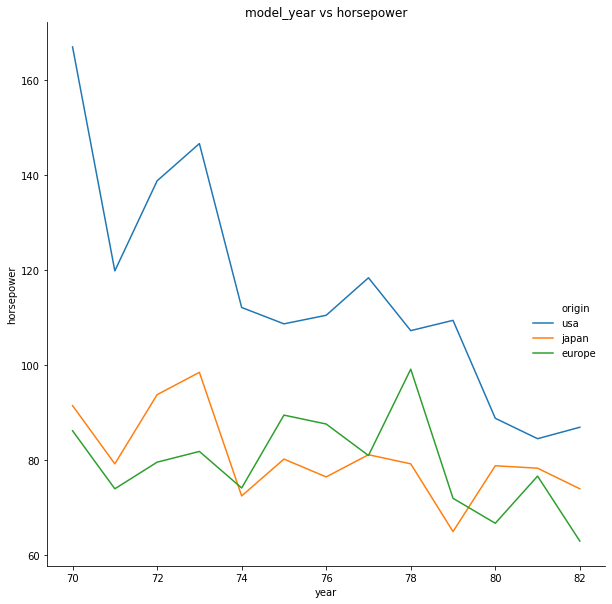

In [8]:
## Q1. 

sns.lineplot(x = 'model_year', y = 'horsepower', hue = 'origin', 
             data = mpg, ci = None)

plt.xlabel('year')
plt.title('model_year vs horsepower')
plt.legend(bbox_to_anchor = (1, 0.5), frameon = False)
sns.despine()

plt.show()

**다음 그래프에서 얻을 수 있는 정보는 무엇인가요?**

origin 이 usa인 경우가 다른 나라인 경우보다 모든 기간에서 horsepower의 크기가 크다.

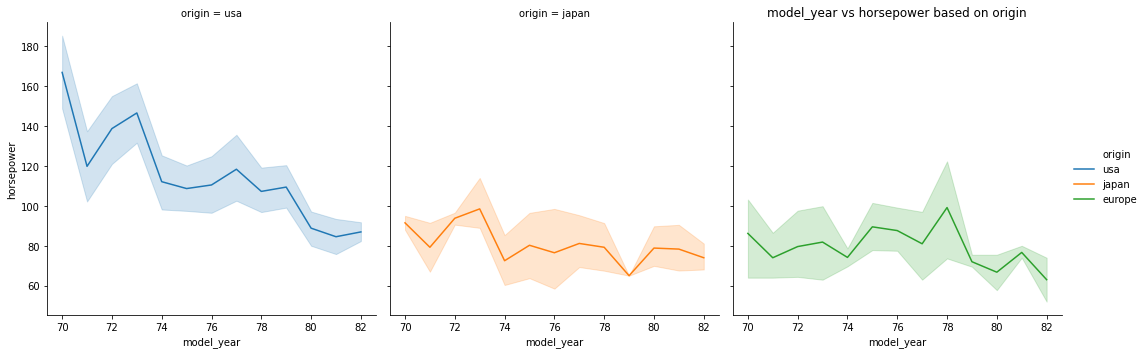

In [9]:
## Q2. 
origin = mpg['origin'].unique()

sns.relplot(
    data=mpg, x="model_year", y="horsepower",
    hue="origin", col="origin",
    kind="line"
)
plt.title('model_year vs horsepower based on origin')

plt.show()

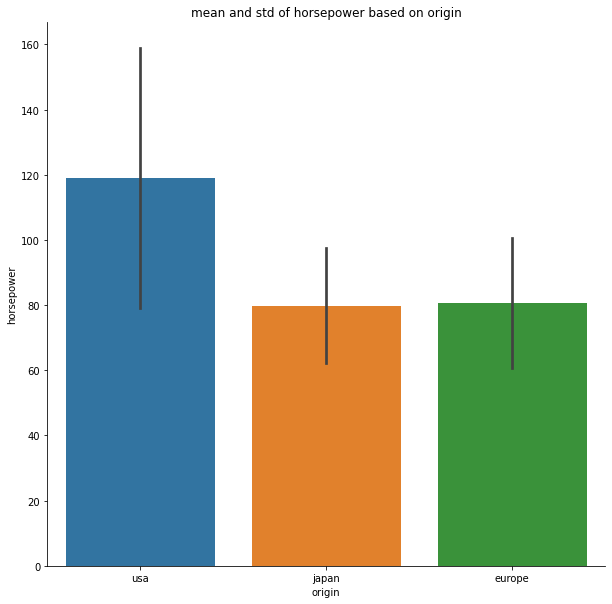

In [10]:
## Q3.
sns.barplot(x = 'origin', y = 'horsepower', data = mpg, ci = 'sd')
plt.title('mean and std of horsepower based on origin')
sns.despine()
plt.show()

**위 그래프에서 얻을 수 있는 정보는 무엇인가요?**

usa의 평균 horsepower가 다른 나라보다 높지만, 표준편차도 크다는 점에서 데이터들의 편차가 크다고 추론할 수 있다.

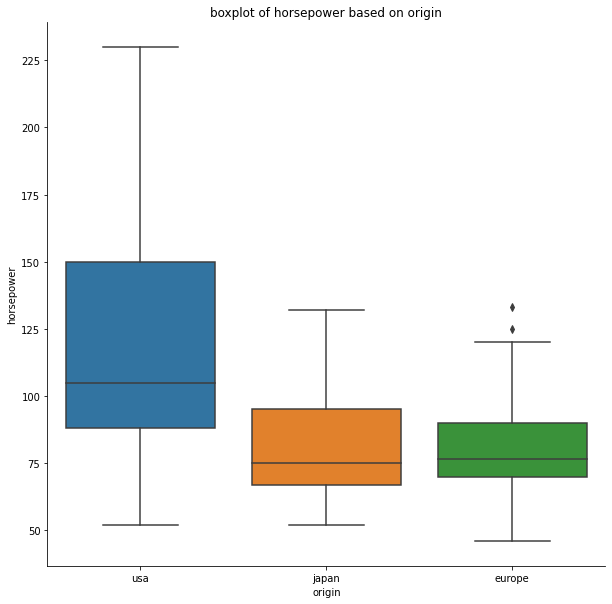

In [11]:
## Q4.
sns.boxplot(x = 'origin', y = 'horsepower', data = mpg)
plt.title('boxplot of horsepower based on origin')
sns.despine()
plt.show()

**1) 위 그래프에서 얻을 수 있는 정보는 무엇인가요?** 

위 그래프에서 얻은 정보에 추가적으로 europe의 경우에는 아웃라이어가 존재한다는 것을 알 수 있다.

**2) box plot에서 그래프 요소가 무엇을 의미하는지 작성해주세요.**

박스는 제1사분위부터 제3사분위의 데이터를 나타낸 것으로 중간의 선은 중앙값의 위치이다.<br>
박스 바깥의 상단 선은 최댓값, 하단 선은 최솟값을 의미한다.<br>
마지막으로 상단 선과 하단 선의 바깥에 찍힌 점은 아웃라이어를 의미한다.

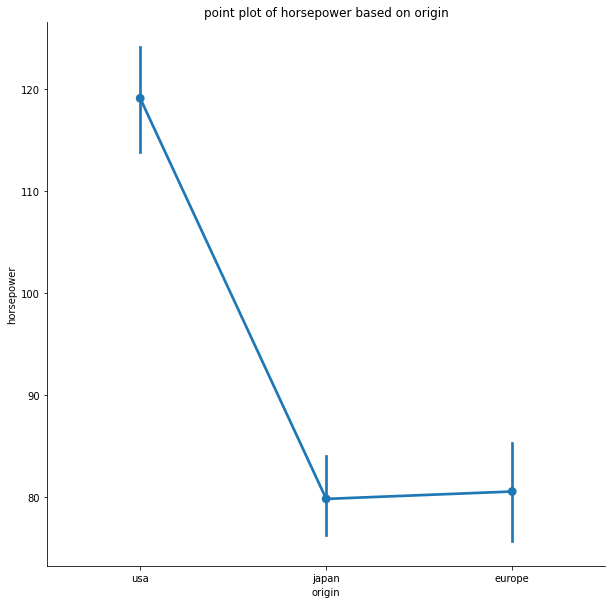

In [12]:
## Q5.
sns.pointplot(x = "origin", y = "horsepower", data = mpg, ci = 95)

plt.title('point plot of horsepower based on origin')
sns.despine()
plt.show()


**위의 그래프에서 얻을 수 있는 정보는 무엇인가요?**

다른 나라에 비해 usa의 horsepower가 가장 크고, 각 나라의 95% 신뢰구간 또한 세로 막대로 알 수 있다.

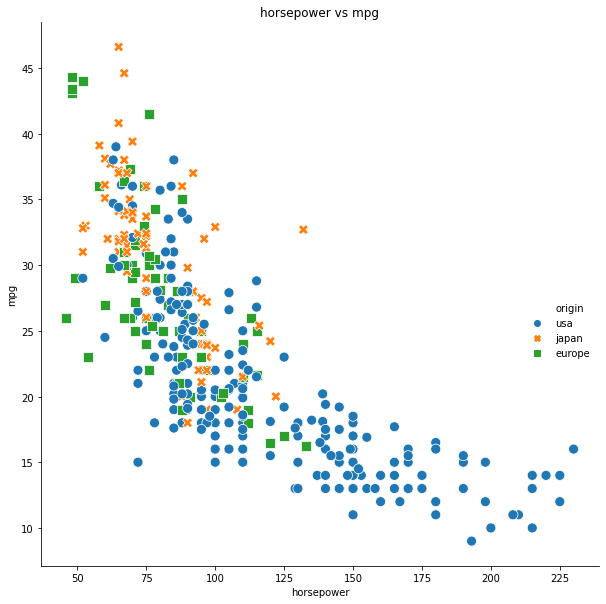

In [13]:
## Q6.

sns.scatterplot(x = 'horsepower', y = 'mpg',  
                hue = 'origin', style = 'origin', 
                data = mpg, s = 100)

plt.title('horsepower vs mpg')

plt.legend(bbox_to_anchor = (1, 0.5), frameon = False)
sns.despine()

plt.show()



**위의 그래프에서 얻을 수 있는 정보는 무엇인가요?**

usa의 경우 horsepower에 따른 mpg 분포가 다른나라에 비해 비교적 고르다. japan과 europe의 차량들은 horsepower가 100 이하에 몰려있고 전반적으로 horsepower가 낮을수록 mpg가 높다. 

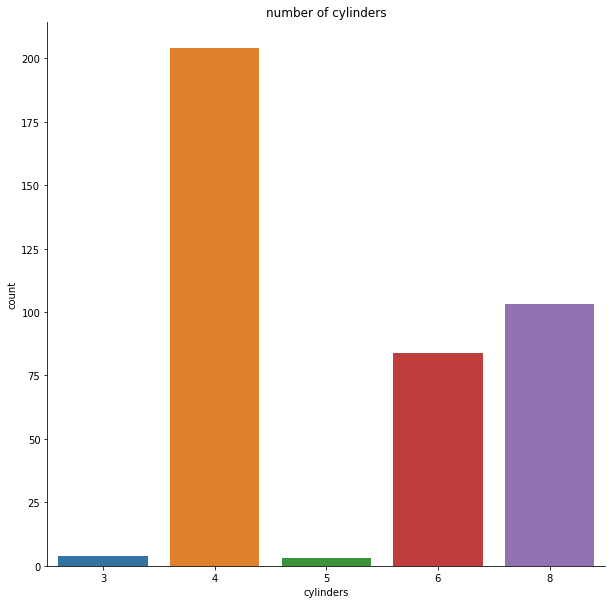

In [14]:
## Q7-1.

sns.countplot(x= 'cylinders', data = mpg)

plt.title('number of cylinders')
sns.despine()

plt.show()

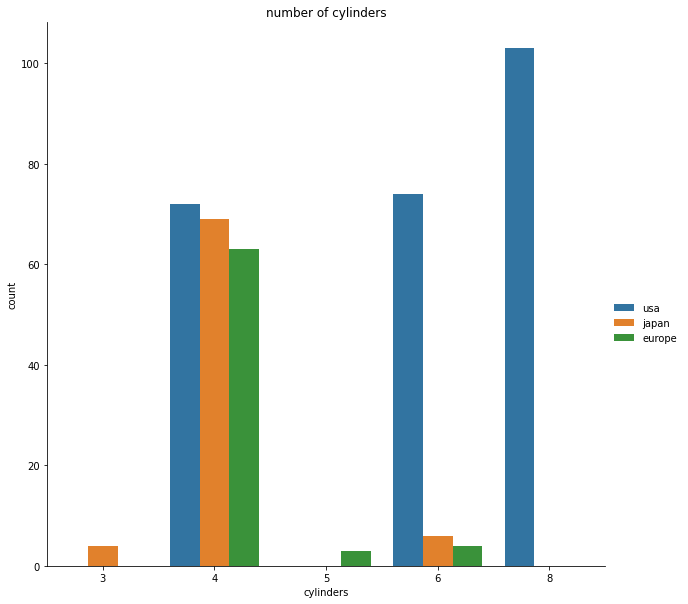

In [15]:
## Q7-2.
sns.countplot(x = 'cylinders', hue = 'origin', 
              data = mpg)

plt.title("number of cylinders")
plt.legend(bbox_to_anchor = (1, 0.5), frameon = False)

sns.despine()


plt.show()

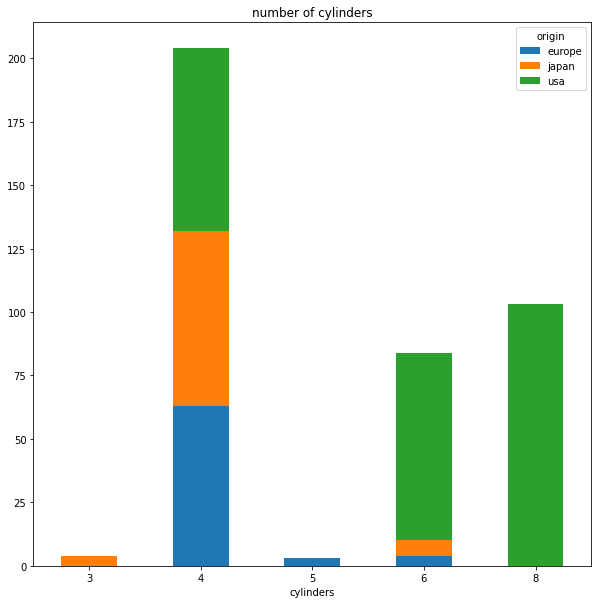

In [16]:
## Q7-3.
mpg6_3 = mpg.pivot_table(index = "cylinders", columns = "origin", values = "mpg", aggfunc = 'count')

mpg6_3.plot.bar(title = "number of cylinders", stacked = True)

plt.xticks(rotation = 360)
plt.show()

**1) 각 그래프에서 얻을 수 있는 정보는 무엇인가요?**

첫번째 그래프에서는 origin을 구별하지 않은 전체 자동차를 대상으로 한 실린더 개수 기준의 차량대수 이고, 두번째와 세번째 그래프는 origin을 구별하여 그린 것이다. 결과적으로 보았을 때, 실린더 개수가 3개 혹은 5개인 차량이 현저히 적고, 4개인 차량이 가장 많으며, 그 다음은 차례로 8개, 6개를 가진 차량의 대수가 많다. 또한 실린더의 개수가 늘어날 수록 usa의 차량 대수가 늘어가는 것을 볼 수 있다.

**2) 3개의 그래프가 가지는 장단점은 무엇인가요?**

첫번째 그래프는 간단하게 countplot을 이용해 나타날 수 있다는 것이 장점이지만, 두번째와 세번째 그래프와 비교했을때, origin을 포함하고 있지 않다는 점에서 내용이 부족하다고 할 수 있다. 두번째와 세번째는 모두 origin을 포함하고 있지만, 세번째 그래프가 각 실린더의 개수에 따른 국가별 자동차 대수 분포를 하나의 bar로 쌓아 나타내고 있기 때문에 한눈에 볼 수 있다는 것이 장점이다.

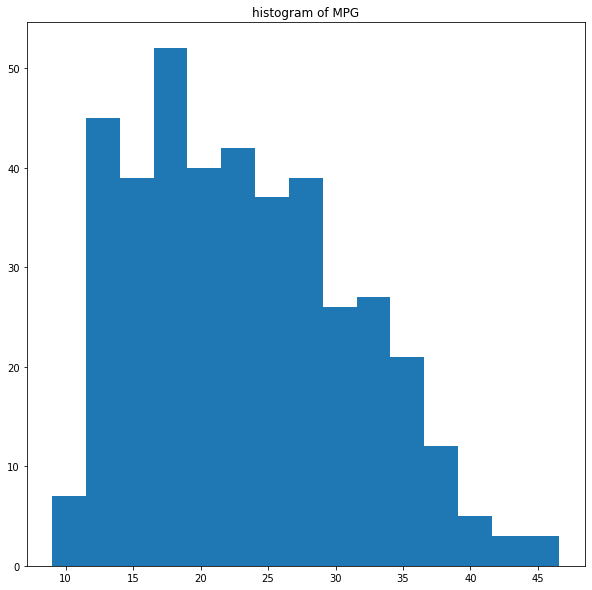

In [17]:
## Q8-1.

n, bins, patches = plt.hist(mpg['mpg'], bins = 15)
plt.title('histogram of MPG')
plt.show()

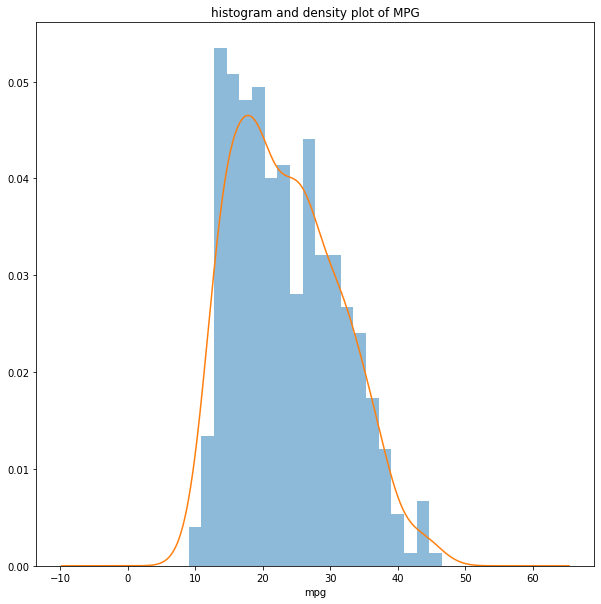

In [18]:
## Q8-2.

plt.hist(mpg['mpg'], density = True, bins = 20, alpha = 0.5)
mpg['mpg'].plot.kde()

plt.xlabel('mpg')
plt.ylabel('')
plt.title('histogram and density plot of MPG')
plt.show()

**위의 그래프에서 얻을 수 있는 정보는 무엇인가요?**<br>
A.bin의 개수에 따라 달라지고, 불연속적이라는 히스토그램의 특성을 보완하기 위해 kde 방식으로 밀도 함수를 그림으로서 smooth한 확률분포를 얻을 수 있다.

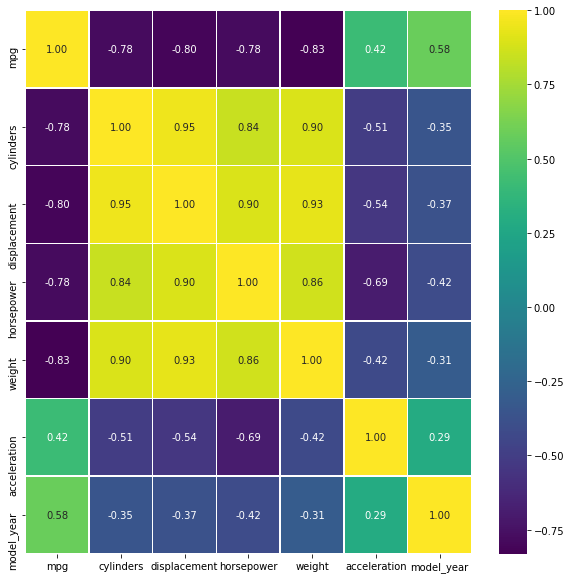

In [23]:
## Q9.

import seaborn as sns

mpg8 = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']].corr()

sns.heatmap(mpg8, cmap='viridis', annot=True, fmt=".2f", linewidth = .5)

plt.show()

**위의 그래프에서 얻을 수 있는 정보는 무엇인가요?**

상관관계를 히트맵으로 나타냄으로써 노란색에 가까운 것은 강한 양의 상관관계를 갖고 있고, 남색에 가까운 것은 강한 음의 상관관계를 갖고 있다고 해석할 수 있다.

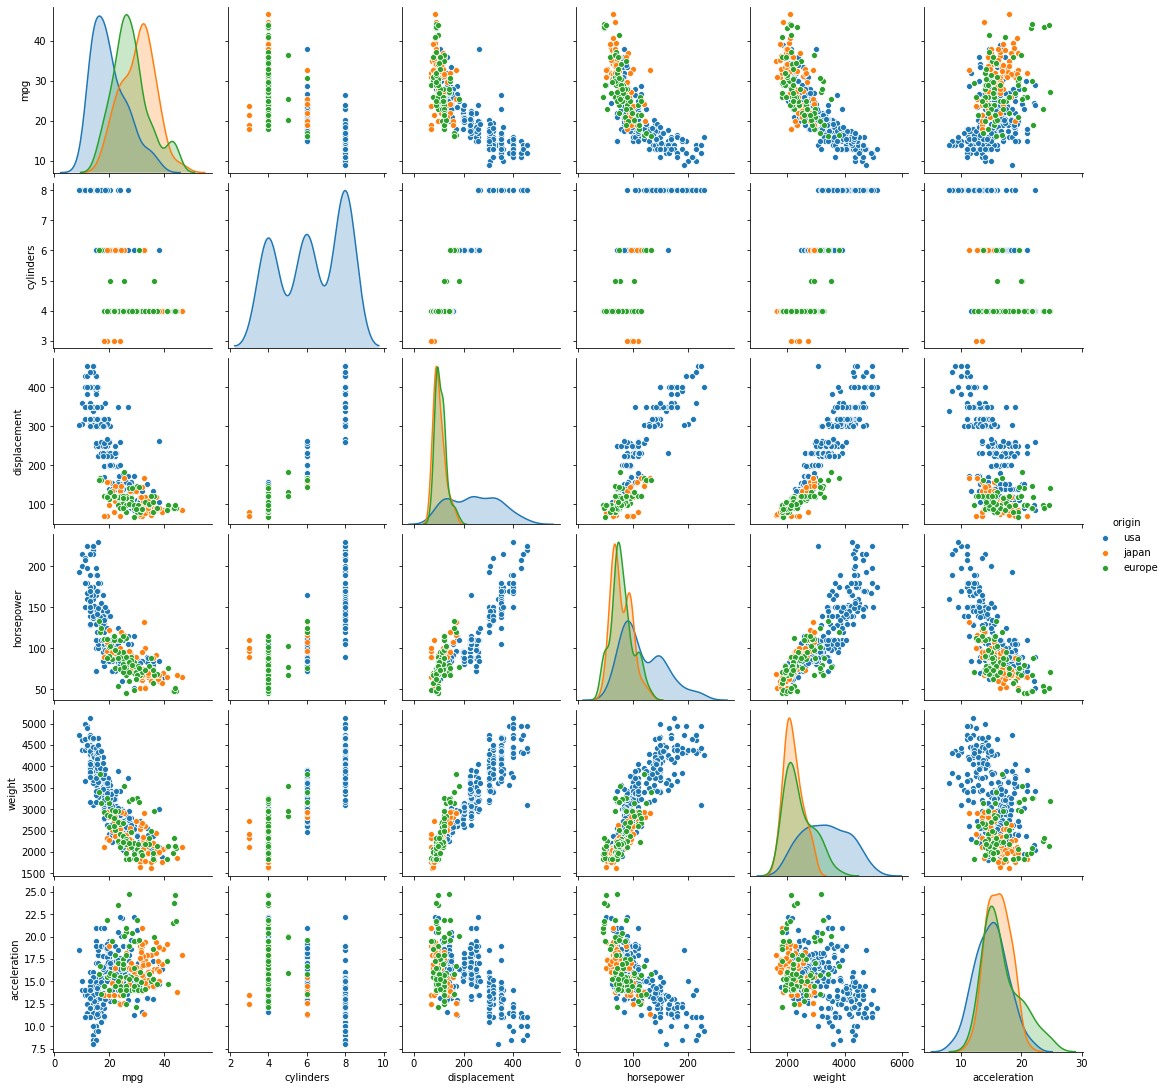

In [20]:
## Q10.
mpg9 = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']]
sns.pairplot(mpg9, hue="origin", diag_kind="kde")

plt.show()